In [1]:
import numpy as np

In [6]:
class FastGradientDescent:
    def __init__(self, gamma, n=5):
        self.alpha = 0
        self.a     = 0
        
        # constants
        self.gamma = gamma
        self.l     = 1 / gamma
        self.n     = n
        
        self.u_lambda = np.ones(n) / n**2
        self.u_mu     = np.ones(n) / n**2
         
        self.y_lambda = np.zeros(n)
        self.y_mu     = np.zeros(n)
        
        self.x_lambda = np.zeros(n)
        self.x_mu     = np.zeros(n)
        
        self.x_lambda   = np.zeros([n])
        self.x_mu       = np.zeros([n])
        
        self.x_0 = np.ones([n, n]) / (n**2)
        
    def _get_x(self, c):
        a = self.x_0 * np.exp(-(self.gamma + c + self.x_lambda.repeat(self.n).reshape(-1, self.n) +\
                                self.x_mu.repeat(self.n).reshape(-1, self.n).T))
        
        return a / a.sum()
    
    def __new_alpha(self):
        return 1 / (2 * self.l) + np.sqrt(1 / (4 * (self.l**2)) + self.alpha**2)
    
    def __new_a(self):
        return self.a + self.__new_alpha()
    
    def _new_y(self):
        return (self.__new_alpha() * self.u_lambda + self.a * self.x_lambda) / self.__new_a(),\
               (self.__new_alpha() * self.u_mu + self.a * self.x_mu) / self.__new_a()
        
        
    def _new_u(self, c, p, q):
        x_hat = self._get_x(c)
        
        return self.u_lambda - self.alpha * (p - x_hat.sum(1)),\
               self.u_mu - self.alpha * (q - x_hat.sum(0))
    
    def _new_x(self):
        return (self.alpha * self.u_lambda + self.a * self.x_lambda) / self.__new_a(),\
                (self.alpha * self.u_mu + self.a * self.x_mu) / self.__new_a()
    
    def fit(self, c, p, q):
        for _ in range(1000):
            self.y_lambda, self.y_mu = self._new_y()
            self.u_lambda, self.u_mu = self._new_u(c, p, q)
            self.x_lambda, self.x_mu = self._new_x()
            
            self.alpha = self.__new_alpha()
            self.a     = self.__new_a()
            
        return self._get_x(c)

In [7]:
fgd = FastGradientDescent(0.5)

In [8]:
def sample_batch(n):
    C = np.random.uniform(0, 10, size=[n, n])
    p = np.random.dirichlet(np.ones(5), size=1).ravel()
    q = np.random.dirichlet(np.ones(5), size=1).ravel()
    return C, p, q

In [13]:
c, p, q = sample_batch(5)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

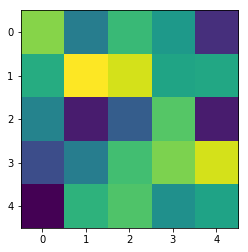

In [20]:
plt.imshow(c)

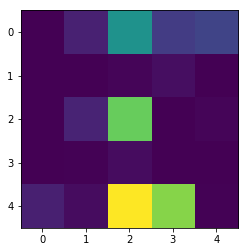

In [19]:
plt.imshow(fgd.fit(c,p,q))